In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.path

In [2]:
# Define Patches for each of the 9 regions
Basins = []
Basins.append('Polar N. Atlantic')
Basins.append('Subtropical N. Atlantic')
Basins.append('Eq. Atlantic')
Basins.append('S. Atlantic')
Basins.append('Indian')
Basins.append('S. Pacific')
Basins.append('Eq. Pacific')
Basins.append('N. Pacific')
Basins.append('Southern Ocean')

IndLonsPts=[25, 25, 40,100, 100, 110,145,145,25];
IndLatsPts=[-90, 28, 30, 30, 0, -10,-10,-90,-90];

PacLonsPts=[145-0.1, 145-0.1, 110-0.1,100-0.1, 100-0.1, 260,260,300,300, 145];
PacLatsPts=[-90, -10, -10, 0, 66, 66,20,0,-90,-90];

transitionlats=[-40, -30, -15, -5, 5, 15, 35, 45];

# EN4 Mask

In [3]:
EN4_grid_info = xr.open_mfdataset('/g/data/e14/txs156/Data/Observations/EN4/EN.4.2.1.f.analysis.g10.197001.nc')

In [4]:
EN4_lat = EN4_grid_info.lat.values
EN4_lon = EN4_grid_info.lon.values
EN4_depth = EN4_grid_info.depth.values

In [5]:
x_pixel_nos = PacLonsPts
y_pixel_nos = PacLatsPts

temp_list = []
for a, b in zip(x_pixel_nos, y_pixel_nos):
    temp_list.append([a, b])

polygon = np.array(temp_list)
left = np.min(polygon, axis=0)
right = np.max(polygon, axis=0)
x = np.arange(math.ceil(left[0]), math.floor(right[0])+1)
y = np.arange(math.ceil(left[1]), math.floor(right[1])+1)
xv, yv = np.meshgrid(EN4_lon, EN4_lat, indexing='xy')
points = np.hstack((xv.reshape((-1,1)), yv.reshape((-1,1))))
path = matplotlib.path.Path(polygon)
mask_Pac = path.contains_points(points)
mask_Pac.shape = xv.shape
mask_Pac_bit = mask_Pac*np.ones_like(xv)

x_pixel_nos = IndLonsPts
y_pixel_nos = IndLatsPts

temp_list = []
for a, b in zip(x_pixel_nos, y_pixel_nos):
    temp_list.append([a, b])

polygon = np.array(temp_list)
left = np.min(polygon, axis=0)
right = np.max(polygon, axis=0)
x = np.arange(math.ceil(left[0]), math.floor(right[0])+1)
y = np.arange(math.ceil(left[1]), math.floor(right[1])+1)
xv, yv = np.meshgrid(EN4_lon, EN4_lat, indexing='xy')
points = np.hstack((xv.reshape((-1,1)), yv.reshape((-1,1))))
path = matplotlib.path.Path(polygon)
mask_Ind = path.contains_points(points)
mask_Ind.shape = xv.shape
mask_Ind_bit = mask_Ind*np.ones_like(xv)

combi_Ind_Pac_mask = np.array(mask_Ind) | np.array(mask_Pac) 
mask_Atl = ~combi_Ind_Pac_mask
mask_Atl_bit = mask_Atl*np.ones_like(xv)



In [6]:
mask_Polar_Atl = np.where((yv<=transitionlats[-1])&(yv>transitionlats[-2]),\
                          mask_Atl_bit*((yv-transitionlats[-2])/\
                                        (transitionlats[-1]-transitionlats[-2])), 0)\
                +np.where(yv>transitionlats[-1],mask_Atl_bit,0)
mask_TN_Atl = np.where((yv<transitionlats[-1])&(yv>=transitionlats[-2]),\
                          mask_Atl_bit*((yv-transitionlats[-1])/\
                                        (transitionlats[-2]-transitionlats[-1])), 0)\
                +np.where((yv>transitionlats[-3])&(yv<transitionlats[-2]),mask_Atl_bit,0)\
              +np.where((yv<=transitionlats[-3])&(yv>transitionlats[-4]),\
                          mask_Atl_bit*((yv-transitionlats[-4])/\
                                        (transitionlats[-3]-transitionlats[-4])), 0)
mask_Eq_Atl = np.where((yv<transitionlats[-3])&(yv>=transitionlats[-4]),\
                          mask_Atl_bit*((yv-transitionlats[-3])/\
                                        (transitionlats[-4]-transitionlats[-3])), 0)\
                +np.where((yv>transitionlats[-5])&(yv<transitionlats[-4]),mask_Atl_bit,0)\
              +np.where((yv<=transitionlats[-5])&(yv>transitionlats[-6]),\
                          mask_Atl_bit*((yv-transitionlats[-6])/\
                                        (transitionlats[-5]-transitionlats[-6])), 0)
mask_SAtl = np.where((yv<transitionlats[-5])&(yv>=transitionlats[-6]),\
                          mask_Atl_bit*((yv-transitionlats[-5])/\
                                        (transitionlats[-6]-transitionlats[-5])), 0)\
                +np.where((yv>transitionlats[-7])&(yv<transitionlats[-6]),mask_Atl_bit,0)\
              +np.where((yv<=transitionlats[-7])&(yv>transitionlats[-8]),\
                          mask_Atl_bit*((yv-transitionlats[-8])/\
                                        (transitionlats[-7]-transitionlats[-8])), 0)
mask_SO_Atl =  np.where((yv<transitionlats[-7])&(yv>=transitionlats[-8]),\
                          mask_Atl_bit*((yv-transitionlats[-7])/\
                                        (transitionlats[-8]-transitionlats[-7])), 0)\
                +np.where(yv<transitionlats[-8],mask_Atl_bit,0)

In [7]:
mask_Polar_Pac = np.where((yv<=transitionlats[-1])&(yv>transitionlats[-2]),\
                          mask_Pac_bit*((yv-transitionlats[-2])/\
                                        (transitionlats[-1]-transitionlats[-2])), 0)\
                +np.where(yv>transitionlats[-1],mask_Pac_bit,0)
mask_TN_Pac = np.where((yv<transitionlats[-1])&(yv>=transitionlats[-2]),\
                          mask_Pac_bit*((yv-transitionlats[-1])/\
                                        (transitionlats[-2]-transitionlats[-1])), 0)\
                +np.where((yv>transitionlats[-3])&(yv<transitionlats[-2]),mask_Pac_bit,0)\
              +np.where((yv<=transitionlats[-3])&(yv>transitionlats[-4]),\
                          mask_Pac_bit*((yv-transitionlats[-4])/\
                                        (transitionlats[-3]-transitionlats[-4])), 0)
mask_NPac = mask_Polar_Pac+mask_TN_Pac

mask_Eq_Pac = np.where((yv<transitionlats[-3])&(yv>=transitionlats[-4]),\
                          mask_Pac_bit*((yv-transitionlats[-3])/\
                                        (transitionlats[-4]-transitionlats[-3])), 0)\
                +np.where((yv>transitionlats[-5])&(yv<transitionlats[-4]),mask_Pac_bit,0)\
              +np.where((yv<=transitionlats[-5])&(yv>transitionlats[-6]),\
                          mask_Pac_bit*((yv-transitionlats[-6])/\
                                        (transitionlats[-5]-transitionlats[-6])), 0)
mask_SPac = np.where((yv<transitionlats[-5])&(yv>=transitionlats[-6]),\
                          mask_Pac_bit*((yv-transitionlats[-5])/\
                                        (transitionlats[-6]-transitionlats[-5])), 0)\
                +np.where((yv>transitionlats[-7])&(yv<transitionlats[-6]),mask_Pac_bit,0)\
              +np.where((yv<=transitionlats[-7])&(yv>transitionlats[-8]),\
                          mask_Pac_bit*((yv-transitionlats[-8])/\
                                        (transitionlats[-7]-transitionlats[-8])), 0)
mask_SO_Pac =  np.where((yv<transitionlats[-7])&(yv>=transitionlats[-8]),\
                          mask_Pac_bit*((yv-transitionlats[-7])/\
                                        (transitionlats[-8]-transitionlats[-7])), 0)\
                +np.where(yv<transitionlats[-8],mask_Pac_bit,0)

In [8]:
mask_Polar_Ind = np.where((yv<=transitionlats[-1])&(yv>transitionlats[-2]),\
                          mask_Ind_bit*((yv-transitionlats[-2])/\
                                        (transitionlats[-1]-transitionlats[-2])), 0)\
                +np.where(yv>transitionlats[-1],mask_Ind_bit,0)
mask_TN_Ind = np.where((yv<transitionlats[-1])&(yv>=transitionlats[-2]),\
                          mask_Ind_bit*((yv-transitionlats[-1])/\
                                        (transitionlats[-2]-transitionlats[-1])), 0)\
                +np.where((yv>transitionlats[-3])&(yv<transitionlats[-2]),mask_Ind_bit,0)\
              +np.where((yv<=transitionlats[-3])&(yv>transitionlats[-4]),\
                          mask_Ind_bit*((yv-transitionlats[-4])/\
                                        (transitionlats[-3]-transitionlats[-4])), 0)
mask_Eq_Ind = np.where((yv<transitionlats[-3])&(yv>=transitionlats[-4]),\
                          mask_Ind_bit*((yv-transitionlats[-3])/\
                                        (transitionlats[-4]-transitionlats[-3])), 0)\
                +np.where((yv>transitionlats[-5])&(yv<transitionlats[-4]),mask_Ind_bit,0)\
              +np.where((yv<=transitionlats[-5])&(yv>transitionlats[-6]),\
                          mask_Ind_bit*((yv-transitionlats[-6])/\
                                        (transitionlats[-5]-transitionlats[-6])), 0)
mask_SInd = np.where((yv<transitionlats[-5])&(yv>=transitionlats[-6]),\
                          mask_Ind_bit*((yv-transitionlats[-5])/\
                                        (transitionlats[-6]-transitionlats[-5])), 0)\
                +np.where((yv>transitionlats[-7])&(yv<transitionlats[-6]),mask_Ind_bit,0)\
              +np.where((yv<=transitionlats[-7])&(yv>transitionlats[-8]),\
                          mask_Ind_bit*((yv-transitionlats[-8])/\
                                        (transitionlats[-7]-transitionlats[-8])), 0)

mask_Ind = mask_Polar_Ind+mask_TN_Ind+mask_Eq_Ind+mask_SInd

mask_SO_Ind =  np.where((yv<transitionlats[-7])&(yv>=transitionlats[-8]),\
                          mask_Ind_bit*((yv-transitionlats[-7])/\
                                        (transitionlats[-8]-transitionlats[-7])), 0)\
                +np.where(yv<transitionlats[-8],mask_Ind_bit,0)

mask_SO = mask_SO_Ind+mask_SO_Pac+mask_SO_Atl

In [9]:
mask_Polar_Atl_3D = np.repeat(mask_Polar_Atl[np.newaxis,:,:], EN4_depth.size, axis=0)
mask_TN_Atl_3D = np.repeat(mask_TN_Atl[np.newaxis,:,:], EN4_depth.size, axis=0)
mask_Eq_Atl_3D = np.repeat(mask_Eq_Atl[np.newaxis,:,:], EN4_depth.size, axis=0)
mask_SAtl_3D = np.repeat(mask_SAtl[np.newaxis,:,:], EN4_depth.size, axis=0)
mask_Ind_3D = np.repeat(mask_Ind[np.newaxis,:,:], EN4_depth.size, axis=0)
mask_NPac_3D = np.repeat(mask_NPac[np.newaxis,:,:], EN4_depth.size, axis=0)
mask_Eq_Pac_3D = np.repeat(mask_Eq_Pac[np.newaxis,:,:], EN4_depth.size, axis=0)
mask_SPac_3D = np.repeat(mask_SPac[np.newaxis,:,:], EN4_depth.size, axis=0)
mask_SO_3D = np.repeat(mask_SO[np.newaxis,:,:], EN4_depth.size, axis=0)

In [10]:
mask_EN4 = np.zeros((np.array(Basins).size,mask_Polar_Atl_3D.shape[0],mask_Polar_Atl_3D.shape[1],mask_Polar_Atl_3D.shape[2]))
mask_EN4[0,:,:,:] = mask_Polar_Atl_3D
mask_EN4[1,:,:,:] = mask_TN_Atl_3D
mask_EN4[2,:,:,:] = mask_Eq_Atl_3D
mask_EN4[3,:,:,:] = mask_SAtl_3D
mask_EN4[4,:,:,:] = mask_Ind_3D
mask_EN4[7,:,:,:] = mask_NPac_3D
mask_EN4[6,:,:,:] = mask_Eq_Pac_3D
mask_EN4[5,:,:,:] = mask_SPac_3D
mask_EN4[8,:,:,:] = mask_SO_3D

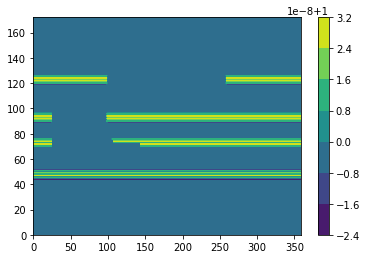

In [14]:
plt.contourf(np.nansum(mask_EN4[:,0,:,:],axis=0))
plt.colorbar()


# Cheng Mask

In [26]:
Cheng_grid_info = xr.open_mfdataset('/g/data/e14/txs156/Data/Observations/Cheng/Temp_raw/CZ16_1_2000m_Temp_year_1970_month_01.nc')

In [27]:
Cheng_lat = Cheng_grid_info.lat.values
Cheng_lon = Cheng_grid_info.lon.values
Cheng_depth = Cheng_grid_info.depth_std.values

In [28]:
x_pixel_nos = PacLonsPts
y_pixel_nos = PacLatsPts

temp_list = []
for a, b in zip(x_pixel_nos, y_pixel_nos):
    temp_list.append([a, b])

polygon = np.array(temp_list)
left = np.min(polygon, axis=0)
right = np.max(polygon, axis=0)
x = np.arange(math.ceil(left[0]), math.floor(right[0])+1)
y = np.arange(math.ceil(left[1]), math.floor(right[1])+1)
xv, yv = np.meshgrid(Cheng_lon, Cheng_lat, indexing='xy')
points = np.hstack((xv.reshape((-1,1)), yv.reshape((-1,1))))
path = matplotlib.path.Path(polygon)
mask_Pac = path.contains_points(points)
mask_Pac.shape = xv.shape
mask_Pac_bit = mask_Pac*np.ones_like(xv)

x_pixel_nos = IndLonsPts
y_pixel_nos = IndLatsPts

temp_list = []
for a, b in zip(x_pixel_nos, y_pixel_nos):
    temp_list.append([a, b])

polygon = np.array(temp_list)
left = np.min(polygon, axis=0)
right = np.max(polygon, axis=0)
x = np.arange(math.ceil(left[0]), math.floor(right[0])+1)
y = np.arange(math.ceil(left[1]), math.floor(right[1])+1)
xv, yv = np.meshgrid(Cheng_lon, Cheng_lat, indexing='xy')
points = np.hstack((xv.reshape((-1,1)), yv.reshape((-1,1))))
path = matplotlib.path.Path(polygon)
mask_Ind = path.contains_points(points)
mask_Ind.shape = xv.shape
mask_Ind_bit = mask_Ind*np.ones_like(xv)

combi_Ind_Pac_mask = np.array(mask_Ind) | np.array(mask_Pac) 
mask_Atl = ~combi_Ind_Pac_mask
mask_Atl_bit = mask_Atl*np.ones_like(xv)

In [29]:
mask_Polar_Atl = np.where((yv<=transitionlats[-1])&(yv>transitionlats[-2]),\
                          mask_Atl_bit*((yv-transitionlats[-2])/\
                                        (transitionlats[-1]-transitionlats[-2])), 0)\
                +np.where(yv>transitionlats[-1],mask_Atl_bit,0)
mask_TN_Atl = np.where((yv<transitionlats[-1])&(yv>=transitionlats[-2]),\
                          mask_Atl_bit*((yv-transitionlats[-1])/\
                                        (transitionlats[-2]-transitionlats[-1])), 0)\
                +np.where((yv>transitionlats[-3])&(yv<transitionlats[-2]),mask_Atl_bit,0)\
              +np.where((yv<=transitionlats[-3])&(yv>transitionlats[-4]),\
                          mask_Atl_bit*((yv-transitionlats[-4])/\
                                        (transitionlats[-3]-transitionlats[-4])), 0)
mask_Eq_Atl = np.where((yv<transitionlats[-3])&(yv>=transitionlats[-4]),\
                          mask_Atl_bit*((yv-transitionlats[-3])/\
                                        (transitionlats[-4]-transitionlats[-3])), 0)\
                +np.where((yv>transitionlats[-5])&(yv<transitionlats[-4]),mask_Atl_bit,0)\
              +np.where((yv<=transitionlats[-5])&(yv>transitionlats[-6]),\
                          mask_Atl_bit*((yv-transitionlats[-6])/\
                                        (transitionlats[-5]-transitionlats[-6])), 0)
mask_SAtl = np.where((yv<transitionlats[-5])&(yv>=transitionlats[-6]),\
                          mask_Atl_bit*((yv-transitionlats[-5])/\
                                        (transitionlats[-6]-transitionlats[-5])), 0)\
                +np.where((yv>transitionlats[-7])&(yv<transitionlats[-6]),mask_Atl_bit,0)\
              +np.where((yv<=transitionlats[-7])&(yv>transitionlats[-8]),\
                          mask_Atl_bit*((yv-transitionlats[-8])/\
                                        (transitionlats[-7]-transitionlats[-8])), 0)
mask_SO_Atl =  np.where((yv<transitionlats[-7])&(yv>=transitionlats[-8]),\
                          mask_Atl_bit*((yv-transitionlats[-7])/\
                                        (transitionlats[-8]-transitionlats[-7])), 0)\
                +np.where(yv<transitionlats[-8],mask_Atl_bit,0)

In [30]:
mask_Polar_Pac = np.where((yv<=transitionlats[-1])&(yv>transitionlats[-2]),\
                          mask_Pac_bit*((yv-transitionlats[-2])/\
                                        (transitionlats[-1]-transitionlats[-2])), 0)\
                +np.where(yv>transitionlats[-1],mask_Pac_bit,0)
mask_TN_Pac = np.where((yv<transitionlats[-1])&(yv>=transitionlats[-2]),\
                          mask_Pac_bit*((yv-transitionlats[-1])/\
                                        (transitionlats[-2]-transitionlats[-1])), 0)\
                +np.where((yv>transitionlats[-3])&(yv<transitionlats[-2]),mask_Pac_bit,0)\
              +np.where((yv<=transitionlats[-3])&(yv>transitionlats[-4]),\
                          mask_Pac_bit*((yv-transitionlats[-4])/\
                                        (transitionlats[-3]-transitionlats[-4])), 0)
mask_NPac = mask_Polar_Pac+mask_TN_Pac

mask_Eq_Pac = np.where((yv<transitionlats[-3])&(yv>=transitionlats[-4]),\
                          mask_Pac_bit*((yv-transitionlats[-3])/\
                                        (transitionlats[-4]-transitionlats[-3])), 0)\
                +np.where((yv>transitionlats[-5])&(yv<transitionlats[-4]),mask_Pac_bit,0)\
              +np.where((yv<=transitionlats[-5])&(yv>transitionlats[-6]),\
                          mask_Pac_bit*((yv-transitionlats[-6])/\
                                        (transitionlats[-5]-transitionlats[-6])), 0)
mask_SPac = np.where((yv<transitionlats[-5])&(yv>=transitionlats[-6]),\
                          mask_Pac_bit*((yv-transitionlats[-5])/\
                                        (transitionlats[-6]-transitionlats[-5])), 0)\
                +np.where((yv>transitionlats[-7])&(yv<transitionlats[-6]),mask_Pac_bit,0)\
              +np.where((yv<=transitionlats[-7])&(yv>transitionlats[-8]),\
                          mask_Pac_bit*((yv-transitionlats[-8])/\
                                        (transitionlats[-7]-transitionlats[-8])), 0)
mask_SO_Pac =  np.where((yv<transitionlats[-7])&(yv>=transitionlats[-8]),\
                          mask_Pac_bit*((yv-transitionlats[-7])/\
                                        (transitionlats[-8]-transitionlats[-7])), 0)\
                +np.where(yv<transitionlats[-8],mask_Pac_bit,0)

In [31]:
mask_Polar_Ind = np.where((yv<=transitionlats[-1])&(yv>transitionlats[-2]),\
                          mask_Ind_bit*((yv-transitionlats[-2])/\
                                        (transitionlats[-1]-transitionlats[-2])), 0)\
                +np.where(yv>transitionlats[-1],mask_Ind_bit,0)
mask_TN_Ind = np.where((yv<transitionlats[-1])&(yv>=transitionlats[-2]),\
                          mask_Ind_bit*((yv-transitionlats[-1])/\
                                        (transitionlats[-2]-transitionlats[-1])), 0)\
                +np.where((yv>transitionlats[-3])&(yv<transitionlats[-2]),mask_Ind_bit,0)\
              +np.where((yv<=transitionlats[-3])&(yv>transitionlats[-4]),\
                          mask_Ind_bit*((yv-transitionlats[-4])/\
                                        (transitionlats[-3]-transitionlats[-4])), 0)
mask_Eq_Ind = np.where((yv<transitionlats[-3])&(yv>=transitionlats[-4]),\
                          mask_Ind_bit*((yv-transitionlats[-3])/\
                                        (transitionlats[-4]-transitionlats[-3])), 0)\
                +np.where((yv>transitionlats[-5])&(yv<transitionlats[-4]),mask_Ind_bit,0)\
              +np.where((yv<=transitionlats[-5])&(yv>transitionlats[-6]),\
                          mask_Ind_bit*((yv-transitionlats[-6])/\
                                        (transitionlats[-5]-transitionlats[-6])), 0)
mask_SInd = np.where((yv<transitionlats[-5])&(yv>=transitionlats[-6]),\
                          mask_Ind_bit*((yv-transitionlats[-5])/\
                                        (transitionlats[-6]-transitionlats[-5])), 0)\
                +np.where((yv>transitionlats[-7])&(yv<transitionlats[-6]),mask_Ind_bit,0)\
              +np.where((yv<=transitionlats[-7])&(yv>transitionlats[-8]),\
                          mask_Ind_bit*((yv-transitionlats[-8])/\
                                        (transitionlats[-7]-transitionlats[-8])), 0)

mask_Ind = mask_Polar_Ind+mask_TN_Ind+mask_Eq_Ind+mask_SInd

mask_SO_Ind =  np.where((yv<transitionlats[-7])&(yv>=transitionlats[-8]),\
                          mask_Ind_bit*((yv-transitionlats[-7])/\
                                        (transitionlats[-8]-transitionlats[-7])), 0)\
                +np.where(yv<transitionlats[-8],mask_Ind_bit,0)

mask_SO = mask_SO_Ind+mask_SO_Pac+mask_SO_Atl

In [32]:
mask_Polar_Atl_3D = np.repeat(mask_Polar_Atl[:,:,np.newaxis], Cheng_depth.size, axis=-1)
mask_TN_Atl_3D = np.repeat(mask_TN_Atl[:,:,np.newaxis], Cheng_depth.size, axis=-1)
mask_Eq_Atl_3D = np.repeat(mask_Eq_Atl[:,:,np.newaxis], Cheng_depth.size, axis=-1)
mask_SAtl_3D = np.repeat(mask_SAtl[:,:,np.newaxis], Cheng_depth.size, axis=-1)
mask_Ind_3D = np.repeat(mask_Ind[:,:,np.newaxis], Cheng_depth.size, axis=-1)
mask_NPac_3D = np.repeat(mask_NPac[:,:,np.newaxis], Cheng_depth.size, axis=-1)
mask_Eq_Pac_3D = np.repeat(mask_Eq_Pac[:,:,np.newaxis], Cheng_depth.size, axis=-1)
mask_SPac_3D = np.repeat(mask_SPac[:,:,np.newaxis], Cheng_depth.size, axis=-1)
mask_SO_3D = np.repeat(mask_SO[:,:,np.newaxis], Cheng_depth.size, axis=-1)

In [33]:
mask_Cheng = np.zeros((np.array(Basins).size,mask_Polar_Atl_3D.shape[0],mask_Polar_Atl_3D.shape[1],mask_Polar_Atl_3D.shape[2]))
mask_Cheng[0,:,:,:] = mask_Polar_Atl_3D
mask_Cheng[1,:,:,:] = mask_TN_Atl_3D
mask_Cheng[2,:,:,:] = mask_Eq_Atl_3D
mask_Cheng[3,:,:,:] = mask_SAtl_3D
mask_Cheng[4,:,:,:] = mask_Ind_3D
mask_Cheng[7,:,:,:] = mask_SPac_3D
mask_Cheng[6,:,:,:] = mask_Eq_Pac_3D
mask_Cheng[5,:,:,:] = mask_NPac_3D
mask_Cheng[8,:,:,:] = mask_SO_3D

# Ishii Mask

In [34]:
Ishii_grid_info = xr.open_mfdataset('/g/data/e14/txs156/Data/Observations/Ishii/sal.1970.grb.nc')

In [35]:

Ishii_lat = Ishii_grid_info.g0_lat_2.values
Ishii_lon = Ishii_grid_info.g0_lon_3.values
Ishii_depth = Ishii_grid_info.lv_DBSL1.values

In [36]:
x_pixel_nos = PacLonsPts
y_pixel_nos = PacLatsPts

temp_list = []
for a, b in zip(x_pixel_nos, y_pixel_nos):
    temp_list.append([a, b])

polygon = np.array(temp_list)
left = np.min(polygon, axis=0)
right = np.max(polygon, axis=0)
x = np.arange(math.ceil(left[0]), math.floor(right[0])+1)
y = np.arange(math.ceil(left[1]), math.floor(right[1])+1)
xv, yv = np.meshgrid(Ishii_lon, Ishii_lat, indexing='xy')
points = np.hstack((xv.reshape((-1,1)), yv.reshape((-1,1))))
path = matplotlib.path.Path(polygon)
mask_Pac = path.contains_points(points)
mask_Pac.shape = xv.shape
mask_Pac_bit = mask_Pac*np.ones_like(xv)

x_pixel_nos = IndLonsPts
y_pixel_nos = IndLatsPts

temp_list = []
for a, b in zip(x_pixel_nos, y_pixel_nos):
    temp_list.append([a, b])

polygon = np.array(temp_list)
left = np.min(polygon, axis=0)
right = np.max(polygon, axis=0)
x = np.arange(math.ceil(left[0]), math.floor(right[0])+1)
y = np.arange(math.ceil(left[1]), math.floor(right[1])+1)
xv, yv = np.meshgrid(Ishii_lon, Ishii_lat, indexing='xy')
points = np.hstack((xv.reshape((-1,1)), yv.reshape((-1,1))))
path = matplotlib.path.Path(polygon)
mask_Ind = path.contains_points(points)
mask_Ind.shape = xv.shape
mask_Ind_bit = mask_Ind*np.ones_like(xv)

combi_Ind_Pac_mask = np.array(mask_Ind) | np.array(mask_Pac) 
mask_Atl = ~combi_Ind_Pac_mask
mask_Atl_bit = mask_Atl*np.ones_like(xv)

In [37]:
mask_Polar_Atl = np.where((yv<=transitionlats[-1])&(yv>transitionlats[-2]),\
                          mask_Atl_bit*((yv-transitionlats[-2])/\
                                        (transitionlats[-1]-transitionlats[-2])), 0)\
                +np.where(yv>transitionlats[-1],mask_Atl_bit,0)
mask_TN_Atl = np.where((yv<transitionlats[-1])&(yv>=transitionlats[-2]),\
                          mask_Atl_bit*((yv-transitionlats[-1])/\
                                        (transitionlats[-2]-transitionlats[-1])), 0)\
                +np.where((yv>transitionlats[-3])&(yv<transitionlats[-2]),mask_Atl_bit,0)\
              +np.where((yv<=transitionlats[-3])&(yv>transitionlats[-4]),\
                          mask_Atl_bit*((yv-transitionlats[-4])/\
                                        (transitionlats[-3]-transitionlats[-4])), 0)
mask_Eq_Atl = np.where((yv<transitionlats[-3])&(yv>=transitionlats[-4]),\
                          mask_Atl_bit*((yv-transitionlats[-3])/\
                                        (transitionlats[-4]-transitionlats[-3])), 0)\
                +np.where((yv>transitionlats[-5])&(yv<transitionlats[-4]),mask_Atl_bit,0)\
              +np.where((yv<=transitionlats[-5])&(yv>transitionlats[-6]),\
                          mask_Atl_bit*((yv-transitionlats[-6])/\
                                        (transitionlats[-5]-transitionlats[-6])), 0)
mask_SAtl = np.where((yv<transitionlats[-5])&(yv>=transitionlats[-6]),\
                          mask_Atl_bit*((yv-transitionlats[-5])/\
                                        (transitionlats[-6]-transitionlats[-5])), 0)\
                +np.where((yv>transitionlats[-7])&(yv<transitionlats[-6]),mask_Atl_bit,0)\
              +np.where((yv<=transitionlats[-7])&(yv>transitionlats[-8]),\
                          mask_Atl_bit*((yv-transitionlats[-8])/\
                                        (transitionlats[-7]-transitionlats[-8])), 0)
mask_SO_Atl =  np.where((yv<transitionlats[-7])&(yv>=transitionlats[-8]),\
                          mask_Atl_bit*((yv-transitionlats[-7])/\
                                        (transitionlats[-8]-transitionlats[-7])), 0)\
                +np.where(yv<transitionlats[-8],mask_Atl_bit,0)

In [38]:
mask_Polar_Pac = np.where((yv<=transitionlats[-1])&(yv>transitionlats[-2]),\
                          mask_Pac_bit*((yv-transitionlats[-2])/\
                                        (transitionlats[-1]-transitionlats[-2])), 0)\
                +np.where(yv>transitionlats[-1],mask_Pac_bit,0)
mask_TN_Pac = np.where((yv<transitionlats[-1])&(yv>=transitionlats[-2]),\
                          mask_Pac_bit*((yv-transitionlats[-1])/\
                                        (transitionlats[-2]-transitionlats[-1])), 0)\
                +np.where((yv>transitionlats[-3])&(yv<transitionlats[-2]),mask_Pac_bit,0)\
              +np.where((yv<=transitionlats[-3])&(yv>transitionlats[-4]),\
                          mask_Pac_bit*((yv-transitionlats[-4])/\
                                        (transitionlats[-3]-transitionlats[-4])), 0)
mask_NPac = mask_Polar_Pac+mask_TN_Pac

mask_Eq_Pac = np.where((yv<transitionlats[-3])&(yv>=transitionlats[-4]),\
                          mask_Pac_bit*((yv-transitionlats[-3])/\
                                        (transitionlats[-4]-transitionlats[-3])), 0)\
                +np.where((yv>transitionlats[-5])&(yv<transitionlats[-4]),mask_Pac_bit,0)\
              +np.where((yv<=transitionlats[-5])&(yv>transitionlats[-6]),\
                          mask_Pac_bit*((yv-transitionlats[-6])/\
                                        (transitionlats[-5]-transitionlats[-6])), 0)
mask_SPac = np.where((yv<transitionlats[-5])&(yv>=transitionlats[-6]),\
                          mask_Pac_bit*((yv-transitionlats[-5])/\
                                        (transitionlats[-6]-transitionlats[-5])), 0)\
                +np.where((yv>transitionlats[-7])&(yv<transitionlats[-6]),mask_Pac_bit,0)\
              +np.where((yv<=transitionlats[-7])&(yv>transitionlats[-8]),\
                          mask_Pac_bit*((yv-transitionlats[-8])/\
                                        (transitionlats[-7]-transitionlats[-8])), 0)
mask_SO_Pac =  np.where((yv<transitionlats[-7])&(yv>=transitionlats[-8]),\
                          mask_Pac_bit*((yv-transitionlats[-7])/\
                                        (transitionlats[-8]-transitionlats[-7])), 0)\
                +np.where(yv<transitionlats[-8],mask_Pac_bit,0)

In [39]:
mask_Polar_Ind = np.where((yv<=transitionlats[-1])&(yv>transitionlats[-2]),\
                          mask_Ind_bit*((yv-transitionlats[-2])/\
                                        (transitionlats[-1]-transitionlats[-2])), 0)\
                +np.where(yv>transitionlats[-1],mask_Ind_bit,0)
mask_TN_Ind = np.where((yv<transitionlats[-1])&(yv>=transitionlats[-2]),\
                          mask_Ind_bit*((yv-transitionlats[-1])/\
                                        (transitionlats[-2]-transitionlats[-1])), 0)\
                +np.where((yv>transitionlats[-3])&(yv<transitionlats[-2]),mask_Ind_bit,0)\
              +np.where((yv<=transitionlats[-3])&(yv>transitionlats[-4]),\
                          mask_Ind_bit*((yv-transitionlats[-4])/\
                                        (transitionlats[-3]-transitionlats[-4])), 0)
mask_Eq_Ind = np.where((yv<transitionlats[-3])&(yv>=transitionlats[-4]),\
                          mask_Ind_bit*((yv-transitionlats[-3])/\
                                        (transitionlats[-4]-transitionlats[-3])), 0)\
                +np.where((yv>transitionlats[-5])&(yv<transitionlats[-4]),mask_Ind_bit,0)\
              +np.where((yv<=transitionlats[-5])&(yv>transitionlats[-6]),\
                          mask_Ind_bit*((yv-transitionlats[-6])/\
                                        (transitionlats[-5]-transitionlats[-6])), 0)
mask_SInd = np.where((yv<transitionlats[-5])&(yv>=transitionlats[-6]),\
                          mask_Ind_bit*((yv-transitionlats[-5])/\
                                        (transitionlats[-6]-transitionlats[-5])), 0)\
                +np.where((yv>transitionlats[-7])&(yv<transitionlats[-6]),mask_Ind_bit,0)\
              +np.where((yv<=transitionlats[-7])&(yv>transitionlats[-8]),\
                          mask_Ind_bit*((yv-transitionlats[-8])/\
                                        (transitionlats[-7]-transitionlats[-8])), 0)

mask_Ind = mask_Polar_Ind+mask_TN_Ind+mask_Eq_Ind+mask_SInd

mask_SO_Ind =  np.where((yv<transitionlats[-7])&(yv>=transitionlats[-8]),\
                          mask_Ind_bit*((yv-transitionlats[-7])/\
                                        (transitionlats[-8]-transitionlats[-7])), 0)\
                +np.where(yv<transitionlats[-8],mask_Ind_bit,0)

mask_SO = mask_SO_Ind+mask_SO_Pac+mask_SO_Atl

In [40]:
mask_Polar_Atl_3D = np.repeat(mask_Polar_Atl[np.newaxis,:,:], Ishii_depth.size, axis=0)
mask_TN_Atl_3D = np.repeat(mask_TN_Atl[np.newaxis,:,:], Ishii_depth.size, axis=0)
mask_Eq_Atl_3D = np.repeat(mask_Eq_Atl[np.newaxis,:,:], Ishii_depth.size, axis=0)
mask_SAtl_3D = np.repeat(mask_SAtl[np.newaxis,:,:], Ishii_depth.size, axis=0)
mask_Ind_3D = np.repeat(mask_Ind[np.newaxis,:,:], Ishii_depth.size, axis=0)
mask_NPac_3D = np.repeat(mask_NPac[np.newaxis,:,:], Ishii_depth.size, axis=0)
mask_Eq_Pac_3D = np.repeat(mask_Eq_Pac[np.newaxis,:,:], Ishii_depth.size, axis=0)
mask_SPac_3D = np.repeat(mask_SPac[np.newaxis,:,:], Ishii_depth.size, axis=0)
mask_SO_3D = np.repeat(mask_SO[np.newaxis,:,:], Ishii_depth.size, axis=0)

In [41]:
mask_Ishii = np.zeros((np.array(Basins).size,mask_Polar_Atl_3D.shape[0],mask_Polar_Atl_3D.shape[1],mask_Polar_Atl_3D.shape[2]))
mask_Ishii[0,:,:,:] = mask_Polar_Atl_3D
mask_Ishii[1,:,:,:] = mask_TN_Atl_3D
mask_Ishii[2,:,:,:] = mask_Eq_Atl_3D
mask_Ishii[3,:,:,:] = mask_SAtl_3D
mask_Ishii[4,:,:,:] = mask_Ind_3D
mask_Ishii[7,:,:,:] = mask_SPac_3D
mask_Ishii[6,:,:,:] = mask_Eq_Pac_3D
mask_Ishii[5,:,:,:] = mask_NPac_3D
mask_Ishii[8,:,:,:] = mask_SO_3D

In [42]:
display(EN4_grid_info)
display(Cheng_grid_info)
display(Ishii_grid_info)



<xarray.Dataset>
Dimensions:                          (depth: 42, lat: 173, lon: 360, time: 1, bnds: 2)
Coordinates:
  * depth                            (depth) float32 5.022 15.08 ... 5.35e+03
  * lat                              (lat) float32 -83.0 -82.0 ... 88.0 89.0
  * lon                              (lon) float32 1.0 2.0 3.0 ... 359.0 360.0
  * time                             (time) datetime64[ns] 1970-01-16T12:00:00
Dimensions without coordinates: bnds
Data variables:
    temperature                      (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    salinity                         (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    temperature_uncertainty          (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    salinity_uncertainty             (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    temperature_observation_weights  (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    salinity_observation_weights     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    time_bnds                        (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    depth_bnds                       (depth, bnds) float32 dask.array<chunksize=(42, 2), meta=np.ndarray>
Attributes: (12/21)
    Conventions:            CF-1.0
    title:                  Temperature and salinity analysis
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    references:             None
    institution:            UK Met Office
    contact:                Simon Good - simon.good@metoffice.gov.uk
    ...                     ...
    stop_time:              00:00:00 UTC
    southernmost_latitude:  -90.5
    northernmost_latitude:  89.5
    westernmost_longitude:  0.5
    easternmost_longitude:  362.5
    file_quality_index:     0

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, time: 1, depth_std: 41)
Coordinates:
  * lat        (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0
  * time       (time) float32 1.97e+05
  * depth_std  (depth_std) float32 1.0 5.0 10.0 20.0 ... 1.7e+03 1.8e+03 2e+03
Data variables:
    temp       (lat, lon, depth_std) float32 dask.array<chunksize=(180, 360, 41), meta=np.ndarray>
Attributes:
    Title:           IAP 3-Dimentional Subsurface Temperature Dataset Using O...
    StartYear:       1970
    StartMonth:      1
    StartDay:        1
    EndYear:         1970
    EndMonth:        1
    EndDay:          30
    Period:          1
    GridProjection:  Mercator, gridded
    GridPoints:      360x180
    Creator:         Lijing Cheng From IAP,CAS,P.R.China
    Reference:       Cheng and Zhu 2016. Journal of Climate; Cheng et al. 201...

<xarray.Dataset>
Dimensions:                (initial_time0_hours: 12, lv_DBSL1: 24, g0_lat_2: 180, g0_lon_3: 360)
Coordinates:
  * initial_time0_hours    (initial_time0_hours) datetime64[ns] 1970-01-15 .....
  * g0_lat_2               (g0_lat_2) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
  * g0_lon_3               (g0_lon_3) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lv_DBSL1               (lv_DBSL1) int32 0 10 20 30 ... 1200 1300 1400 1500
Data variables:
    SALTY_GDS0_DBSL        (initial_time0_hours, lv_DBSL1, g0_lat_2, g0_lon_3) float32 dask.array<chunksize=(12, 24, 180, 360), meta=np.ndarray>
    MSLMA_GDS0_DBSL        (initial_time0_hours, lv_DBSL1, g0_lat_2, g0_lon_3) float32 dask.array<chunksize=(12, 24, 180, 360), meta=np.ndarray>
    initial_time0_encoded  (initial_time0_hours) float64 dask.array<chunksize=(12,), meta=np.ndarray>
    initial_time0          (initial_time0_hours) |S18 dask.array<chunksize=(12,), meta=np.ndarray>
Attributes:
    creation_date:  Tue Jan 26 22:17:49 MST 2021
    NCL_Version:    6.6.2
    system:         Linux casper34 3.10.0-1127.18.2.el7.x86_64 #1 SMP Sun Jul...
    Conventions:    None
    grib_source:    sal.1970.grb.grb
    title:          NCL: convert-GRIB-to-netCDF

In [43]:
mask_EN4_da = xr.DataArray(data=mask_EN4,
     dims=["Basins", "depth", "lat", "lon"],
     coords=dict(
         Basins = Basins,
         lon=EN4_lon,
         lat=EN4_lat,
         depth=EN4_depth),
     attrs=dict(
         description="Basin Masks"))

mask_Cheng_da = xr.DataArray(data=mask_Cheng,
     dims=["Basins", "lat", "lon","depth_std"],
     coords=dict(
         Basins = Basins,
         lon=Cheng_lon,
         lat=Cheng_lat,
         depth_std=Cheng_depth),
     attrs=dict(
         description="Basin Masks"))

mask_Ishii_da = xr.DataArray(data=mask_Ishii,
     dims=["Basins", "lv_DBSL1", "g0_lat_2", "g0_lon_3"],
     coords=dict(
         Basins = Basins,
         g0_lon_3 = Ishii_lon,
         g0_lat_2 = Ishii_lat,
         lv_DBSL1 = Ishii_depth),
     attrs=dict(
         description="Basin Masks"))

In [44]:
mask_EN4_da.to_netcdf('mask_EN4.nc')
mask_Cheng_da.to_netcdf('mask_Cheng.nc')
mask_Ishii_da.to_netcdf('mask_Ishii.nc')

# EN4 test

In [12]:
chunks = {'time': 1}
EN4_historical = xr.open_mfdataset('/g/data/e14/txs156/Data/Observations/EN4/EN4_CT_SA_*.nc',decode_times=True, chunks = chunks)
EN4_mask = xr.open_mfdataset('/g/data/e14/txs156/Analysis/Min_Transform_Method/Mask_creation/mask_EN4.nc',decode_times=True, chunks = chunks)
EN4_depth = EN4_historical.depth.values
dArea_3D = EN4_historical.dArea.expand_dims({'depth':EN4_depth.size},axis=1).assign_coords(depth=EN4_depth)
display(dArea_3D)


EN4_mask_4D = EN4_mask.expand_dims({'time':EN4_historical.time.size},axis=1).assign_coords(time=EN4_historical.time)



,Array,Chunk
Bytes,10.52 GiB,19.96 MiB
Shape,"(540, 42, 173, 360)","(1, 42, 173, 360)"
Count,3240 Tasks,540 Chunks
Type,float64,numpy.ndarray


object


In [15]:
Basins = EN4_mask.Basins.values
print(np.array(Basins))

['Polar N. Atlantic' 'Subtropical N. Atlantic' 'Eq. Atlantic'
 'S. Atlantic' 'Indian' 'S. Pacific' 'Eq. Pacific' 'N. Pacific'
 'Southern Ocean']


In [35]:
%%time
## Flatten Area, Salinity and Temp (becomes 540x5400000 array) 
mask_flattened = (EN4_mask_4D.__xarray_dataarray_variable__.stack(z=("lon", "lat", "depth")))
volcello_flattened = EN4_historical.dVol.stack(z=("lon", "lat", "depth"))
areacello_flattened = (dArea_3D.stack(z=("lon", "lat", "depth")))
bigthetao_flattened = (EN4_historical.Cons_Temp.stack(z=("lon", "lat", "depth")))
so_flattened = (EN4_historical.Abs_Sal.stack(z=("lon", "lat", "depth")))
BA = mask_flattened.values
V = volcello_flattened.values
S = ((so_flattened)).values
T = ((bigthetao_flattened)).values
A = (areacello_flattened).values
N = A.shape[1] 

CPU times: user 1min 47s, sys: 3min 30s, total: 5min 18s
Wall time: 5min 57s


In [34]:
depth=8
window = 60
ti = 0

weights = [31,28.25,31,30,31,30,31,31,30,31,30,31]
months = np.nancumsum(weights)/np.sum(weights)
months_repeating = np.tile(months, int(window/12))

partitions_hist = np.zeros((EN4_mask.Basins.size, window,2**depth, 4))
T_mean_hist = np.zeros((EN4_mask.Basins.size, window,2**depth))
S_mean_hist = np.zeros((EN4_mask.Basins.size, window,2**depth))
V_sum_hist = np.zeros((EN4_mask.Basins.size, window,2**depth))
T_reg_mean_hist = np.zeros((EN4_mask.Basins.size, window,2**depth))
S_reg_mean_hist = np.zeros((EN4_mask.Basins.size, window,2**depth))
A_sum_hist = np.zeros((EN4_mask.Basins.size, window,2**depth))
time_array = np.zeros(window)
# display(V)
# # display(BA)
# # display(S)
# # display(T)
# # display(A)
for j in (range(9)):
    print(j)
    for i in range(1):
#         # time_array[int(i-ti*window)] = i#np.floor(i/12)+months_repeating[int(i-ti*window)] 
#         # # Get a single timestep as numpy, not dask
        x = S[i,:]
        y = T[i,:]
        v = A[i,:]
        c = V[i,:]*BA[j,i,:]

0
1


KeyboardInterrupt: 